In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings ( "ignore" )
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
insurance=pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor

In [4]:

insurance.head(1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [5]:
insurance.shape

(9134, 24)

In [17]:
pip install mlxtend 

  Using cached https://files.pythonhosted.org/packages/64/e2/1610a86284029abcad0ac9bc86cb19f9787fe6448ede467188b2a5121bb4/mlxtend-0.17.2-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:

data1=pd.read_csv('Insurance data for model building Final.csv')
data1.head(1)
ins=pd.read_csv('Insurance.csv')
ins = ins.drop(['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount'], axis = 1)
ins=ins.join(data1['Customer Lifetime Value_boxcox'])
ins=ins.join(data1['Monthly Premium Auto_boxcox'])
ins=ins.join(data1['Total Claim Amount_boxcox'])
ins.drop(['Customer','Effective To Date'],axis=1,inplace=True)
ins.head(1)

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Customer Lifetime Value_boxcox,Monthly Premium Auto_boxcox,Total Claim Amount_boxcox
0,Washington,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2.703839,0.685347,33.035752


In [4]:

ins['Coverage'] = ins['Coverage'].replace({'Basic':0, 'Extended':1, 'Premium': 2})
ins['Education'] = ins['Education'].replace({'High School or Below':0, 'College':1, 'Bachelor': 2, 'Master': 3, 'Doctor': 4})
ins['Marital Status'] = ins['Marital Status'].replace({'Married':0, 'Single':1, 'Divorced': 2})
ins['Renew Offer Type'] = ins['Renew Offer Type'].replace({'Offer1':0, 'Offer2':1, 'Offer3': 2, 'Offer4': 3})
ins['Vehicle Class'] = ins['Vehicle Class'].replace({'Two-Door Car':0, 'Four-Door Car':1, 'SUV': 2, 'Luxury SUV': 3, 
                                                   'Sports Car': 4, 'Luxury Car': 5})
ins['State'] = ins['State'].replace({'Washington':1, 'Arizona':2, 'Nevada':3, 'California':4, 'Oregon':5})
ins['Response'] = ins['Response'].replace({'Yes':1, 'No':0})
ins['Gender'] = ins['Gender'].replace({'M':1, 'F':0})
ins['EmploymentStatus'] = ins['EmploymentStatus'].replace({'Unemployed':0, 'Disabled':1, 'Retired':2, 
                                                                 'Medical Leave':3,'Employed':4})
ins['Location Code'] = ins['Location Code'].replace({'Rural':0, 'Suburban':1, 'Urban':2})
ins['Policy Type'] = ins['Policy Type'].replace({'Corporate Auto':0, 'Personal Auto':1, 'Special Auto':2})
ins['Sales Channel'] = ins['Sales Channel'].replace({'Agent':0, 'Call Center':1, 'Web':2,'Branch':3})
ins['Vehicle Size'] = ins['Vehicle Size'].replace({'Small':0, 'Medsize':1, 'Large':2})
ins['Policy'] = ins['Policy'].replace({'Corporate L1':0, 'Corporate L2':1, 'Corporate L3':2, 
                                                                 'Personal L1':3, 'Personal L2':4, 'Personal L3':5,
                                            'Special L1':6, 'Special L2':7, 'Special L3':8})

In [5]:
X=ins.drop(['Customer Lifetime Value_boxcox'],axis=1)
y=ins['Customer Lifetime Value_boxcox']
ins.shape

(9134, 22)

In [31]:
import statsmodels.api as sm
Xc = sm.add_constant(X)
result = sm.OLS(y, Xc).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Customer Lifetime Value_boxcox   R-squared:                       0.295
Model:                                        OLS   Adj. R-squared:                  0.294
Method:                             Least Squares   F-statistic:                     181.9
Date:                            Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                                    17:04:22   Log-Likelihood:                 20471.
No. Observations:                            9134   AIC:                        -4.090e+04
Df Residuals:                                9112   BIC:                        -4.074e+04
Df Model:                                      21                                         
Covariance Type:                        nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -19.9935      0.887    -22.550      0.000     -21.731     -18.255
State                             0.0003      0.000      1.312      0.189      -0.000       0.001
Response                         -0.0016      0.001     -2.005      0.045      -0.003   -3.54e-05
Coverage                         -0.0005      0.001     -0.889      0.374      -0.002       0.001
Education                        -0.0004      0.000     -1.611      0.107      -0.001    8.85e-05
EmploymentStatus                  0.0011      0.000      4.056      0.000       0.001       0.002
Gender                           -0.0008      0.001     -1.384      0.166      -0.002       0.000
Income                          2.22e-08   1.51e-08      1.470      0.142   -7.41e-09    5.18e-08
Location Code                    -0.0001      0.001     -0.196      0.845      -0.001       0.001
Marital Status                   -0.0002      0.000     -0.488      0.626      -0.001       0.001
Months Since Last Claim        2.702e-05   2.68e-05      1.006      0.314   -2.56e-05    7.96e-05
Months Since Policy Inception -9.032e-06   9.72e-06     -0.929      0.353   -2.81e-05       1e-05
Number of Open Complaints        -0.0014      0.000     -4.781      0.000      -0.002      -0.001
Number of Policies                0.0033      0.000     28.692      0.000       0.003       0.003
Policy Type                       0.0020      0.001      1.643      0.101      -0.000       0.004
Policy                           -0.0003      0.000     -0.770      0.441      -0.001       0.000
Renew Offer Type                 -0.0018      0.000     -6.407      0.000      -0.002      -0.001
Sales Channel                    -0.0002      0.000     -0.816      0.415      -0.001       0.000
Vehicle Class                     0.0011      0.000      2.746      0.006       0.000       0.002
Vehicle Size                     -0.0009      0.001     -1.793      0.073      -0.002    8.51e-05
Monthly Premium Auto_boxcox      33.1461      1.294     25.609      0.000      30.609      35.683
Total Claim Amount_boxcox      1.932e-05   3.47e-05      0.557      0.578   -4.87e-05    8.74e-05
==============================================================================
Omnibus:                      871.514   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1148.161
Skew:                           0.868   Prob(JB):                    4.79e-250
Kurtosis:                       2.982   Cond. No.                     2.82e+08
==============================================================================

Warnings:
[1] Standard Err

## 1. FORWARD ELIMINATION 

In [23]:

clf = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 12,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

<IPython.core.display.Javascript object>

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.2s finished

[2020-04-29 16:26:02] Features: 1/12 -- score: 0.21640947639280417[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished

[2020-04-29 16:26:02] Features: 2/12 -- score: 0.28121808552873545[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished

[2020-04-29 16:26:02] Features: 3/12 -- score: 0.28503580581543764[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [25]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
print(X.columns)
So, most important features according to the forward selection method is 'State','Response',

[0, 1, 4, 8, 11, 12, 13, 14, 15, 16, 17, 19]
Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class',
       'Vehicle Size', 'Monthly Premium Auto_boxcox',
       'Total Claim Amount_boxcox'],
      dtype='object')


## 2. Backward elimination

In [26]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Response', 'EmploymentStatus', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Renew Offer Type', 'Vehicle Class', 'Monthly Premium Auto_boxcox']


## 3. RFE - Recursive Feature Elimination

In [54]:
#Initializing RFE model
model = LinearRegression()
rfe = RFE(model, )
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True False False False False False  True
  True  True False  True False  True  True  True False]
[ 5  1  2  3  1  1 12  9  7  8 11  1  1  1  4  1  6  1  1  1 10]


## 4. Lasso 

### Find ideal alpha for Lasso and then see the score and coefficient

In [90]:
lasso=LassoCV()
lasso.fit(X,y)
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(X,y))


Best alpha using built-in LassoCV: 0.044747
Best score using built-in LassoCV: 0.045783


Text(0.5, 1.0, 'Feature importance using Lasso Model')

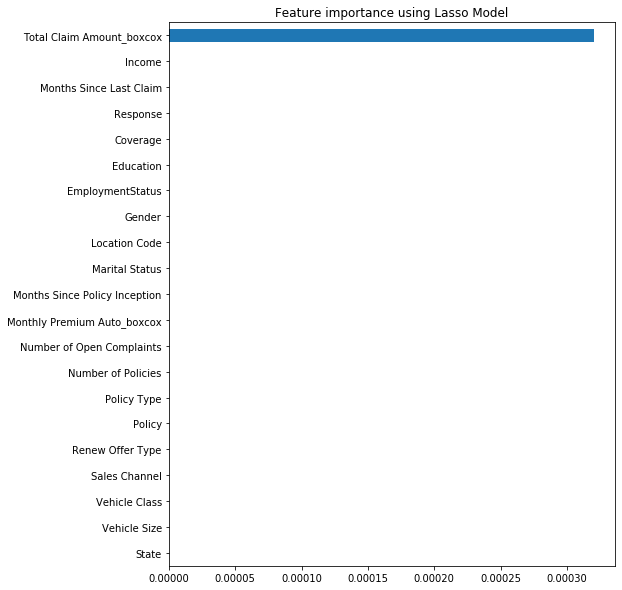

In [93]:
lasso_coef = pd.Series(lasso.coef_, index = X.columns)
lasso_coef = lasso_coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
lasso_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## 5.Ridge

### Find ideal alpha for Ridge and then see the score and coefficient

In [100]:
ridge=RidgeCV()
ridge.fit(X,y)
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)
print("Best score using built-in RidgeCV: %f" %ridge.score(X,y))
ridge_coef = pd.Series(ridge.coef_, index = X.columns)


Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: 0.245091


Text(0.5, 1.0, 'Feature importance using Ridge Model')

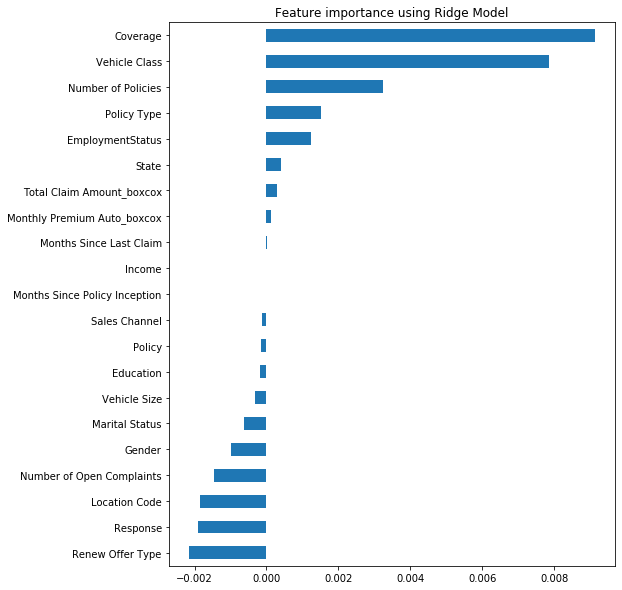

In [78]:
ridge_coef = ridge_coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
ridge_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

In [ ]:
INFERENCE : Ridge model has taken only Income feature into consideration
State', 'Response',EmploymentStatus,Marital Status,Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class','Monthly Premium Auto_boxcox',
    
    
['Response', 'EmploymentStatus', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Renew Offer Type', 'Vehicle Class', 'Monthly Premium Auto_boxcox']

In [ ]:
[0, 1, 4, 8, 11, 12, 13, 14, 15, 16, 17, 19]
Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class',
       'Vehicle Size', 'Monthly Premium Auto_boxcox',
       'Total Claim Amount_boxcox'],
      dtype='object')

In [ ]:

'State', 'Response',EmploymentStatus,Marital Status,Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class','Monthly Premium Auto_boxcox',

In [108]:
imp=[ 5,  1,  2 , 3  ,1,  1, 12 , 9 , 7  ,8 ,11  ,1 , 1  ,1  ,4 , 1 , 6,  1,  1,  1, 10]
len(imp)

21

In [102]:
cols=X.columns

In [118]:
imp=[ 5,  1,  2 , 3  ,1,  1, 12 , 9 , 7  ,8 ,11  ,1 , 1  ,1  ,4 , 1 , 6,  1,  1,  1, 10]

zip(imp,cols)


In [123]:
from collections import defaultdict
imp=[ 5,  1,  2 , 3  ,1,  1, 12 , 9 , 7  ,8 ,11  ,1 , 1  ,1  ,4 , 1 , 6,  1,  1,  1, 10]
cols=list(X.columns)
my_dict = defaultdict(list)
for k, v in zip(cols, imp):
    my_dict[k].append(v)
my_dict

defaultdict(list,
            {'State': [5],
             'Response': [1],
             'Coverage': [2],
             'Education': [3],
             'EmploymentStatus': [1],
             'Gender': [1],
             'Income': [12],
             'Location Code': [9],
             'Marital Status': [7],
             'Months Since Last Claim': [8],
             'Months Since Policy Inception': [11],
             'Number of Open Complaints': [1],
             'Number of Policies': [1],
             'Policy Type': [1],
             'Policy': [4],
             'Renew Offer Type': [1],
             'Sales Channel': [6],
             'Vehicle Class': [1],
             'Vehicle Size': [1],
             'Monthly Premium Auto_boxcox': [1],
             'Total Claim Amount_boxcox': [10]})

In [124]:
li=['State', 'Response','EmploymentStatus','Marital Status','Number of Open Complaints', 'Number of Policies', 'Policy Type','Gender'
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class','Monthly Premium Auto_boxcox','Vehicle Size']
    

In [ ]:
Education
EmploymentStatus
Income
Marital Status
Months Since Last Claim
Months Since Policy Inception
Number of Open Complaints
Number of Policies
Renew Offer Type
Vehicle Class
Vehicle Size
Customer Lifetime Value_boxcox
Monthly Premium Auto_boxcox
Total Claim Amount_boxcox

In [6]:
# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)
forest.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=250, n_jobs=None, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 12 (0.683495)
2. feature 19 (0.174368)
3. feature 17 (0.038792)
4. feature 2 (0.019778)
5. feature 4 (0.009073)
6. feature 20 (0.006410)
7. feature 1 (0.006188)
8. feature 9 (0.006056)
9. feature 10 (0.005811)
10. feature 11 (0.005544)
11. feature 15 (0.005282)
12. feature 8 (0.005150)
13. feature 6 (0.005004)
14. feature 3 (0.004978)
15. feature 16 (0.004672)
16. feature 0 (0.004108)
17. feature 18 (0.003648)
18. feature 14 (0.003512)
19. feature 5 (0.003110)
20. feature 7 (0.002841)
21. feature 13 (0.002181)


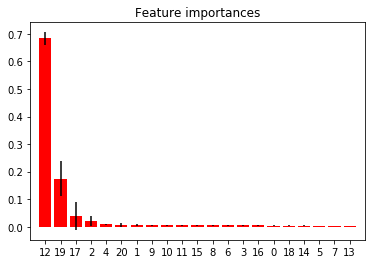

In [7]:

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [9]:
li=X.columns

In [12]:
li[17],li[12],li[19]

('Vehicle Class', 'Number of Policies', 'Monthly Premium Auto_boxcox')

In [17]:
li[18]

'Vehicle Size'